In [26]:
from glob import glob
from astroquery.mast import Mast, Observations
import os
import shutil
import numpy as np
import json
import requests
import asdf
from astropy import log
from astropy.io import ascii, fits
from astropy.utils.data import download_file
from astropy.visualization import simple_norm
from astropy.visualization import ImageNormalize, ManualInterval, LogStretch, LinearStretch
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.table import Table

from align_to_catalogs import *
import astropy.units as u

In [38]:
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['image.origin'] = 'lower'

In [17]:
files = glob('/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong*')
files

['/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong_destreak_realigned.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong_destreak_realigned_to_vvv.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong_rate.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong_destreak_tweakregstep.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong_trapsfilled.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong_destreak_realigned_to_vvv_cat.ecsv',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong_destreak_o002_crf.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong_rateints.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong_outlier_i2d.fits',
 '/orange/adamginsb

In [43]:
destreak_fn =  '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong_destreak_realigned_to_vvv.fits'
destcatt_fn =  '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong_destreak_realigned_to_vvv_cat.ecsv'

In [44]:
tbl = Table.read(destcatt_fn)
tbl

id,x,y,flux
int64,float64,float64,float64
1,1173.8766451194742,528.6284035987152,222.2845916748047
2,1042.6817244012136,1035.3139723298991,203.2763214111328
3,932.8282266282752,1464.938279050446,185.0511932373047
4,646.2776390639227,830.1726609724311,183.07984924316406
5,1090.99275500547,1588.373657789946,178.62953186035156
6,710.9504503889603,1674.0170544937148,168.43003845214844
7,2011.3012692024322,1038.1486933478648,162.86026000976562
8,1633.508703659724,1176.1667255782972,159.95730590820312
9,298.15592344098235,511.82206160204186,159.87686157226562


In [67]:
pwd

'/blue/adamginsburg/adamginsburg/jwst/cloudc/reduction/brick-jwst-2221/reduction'

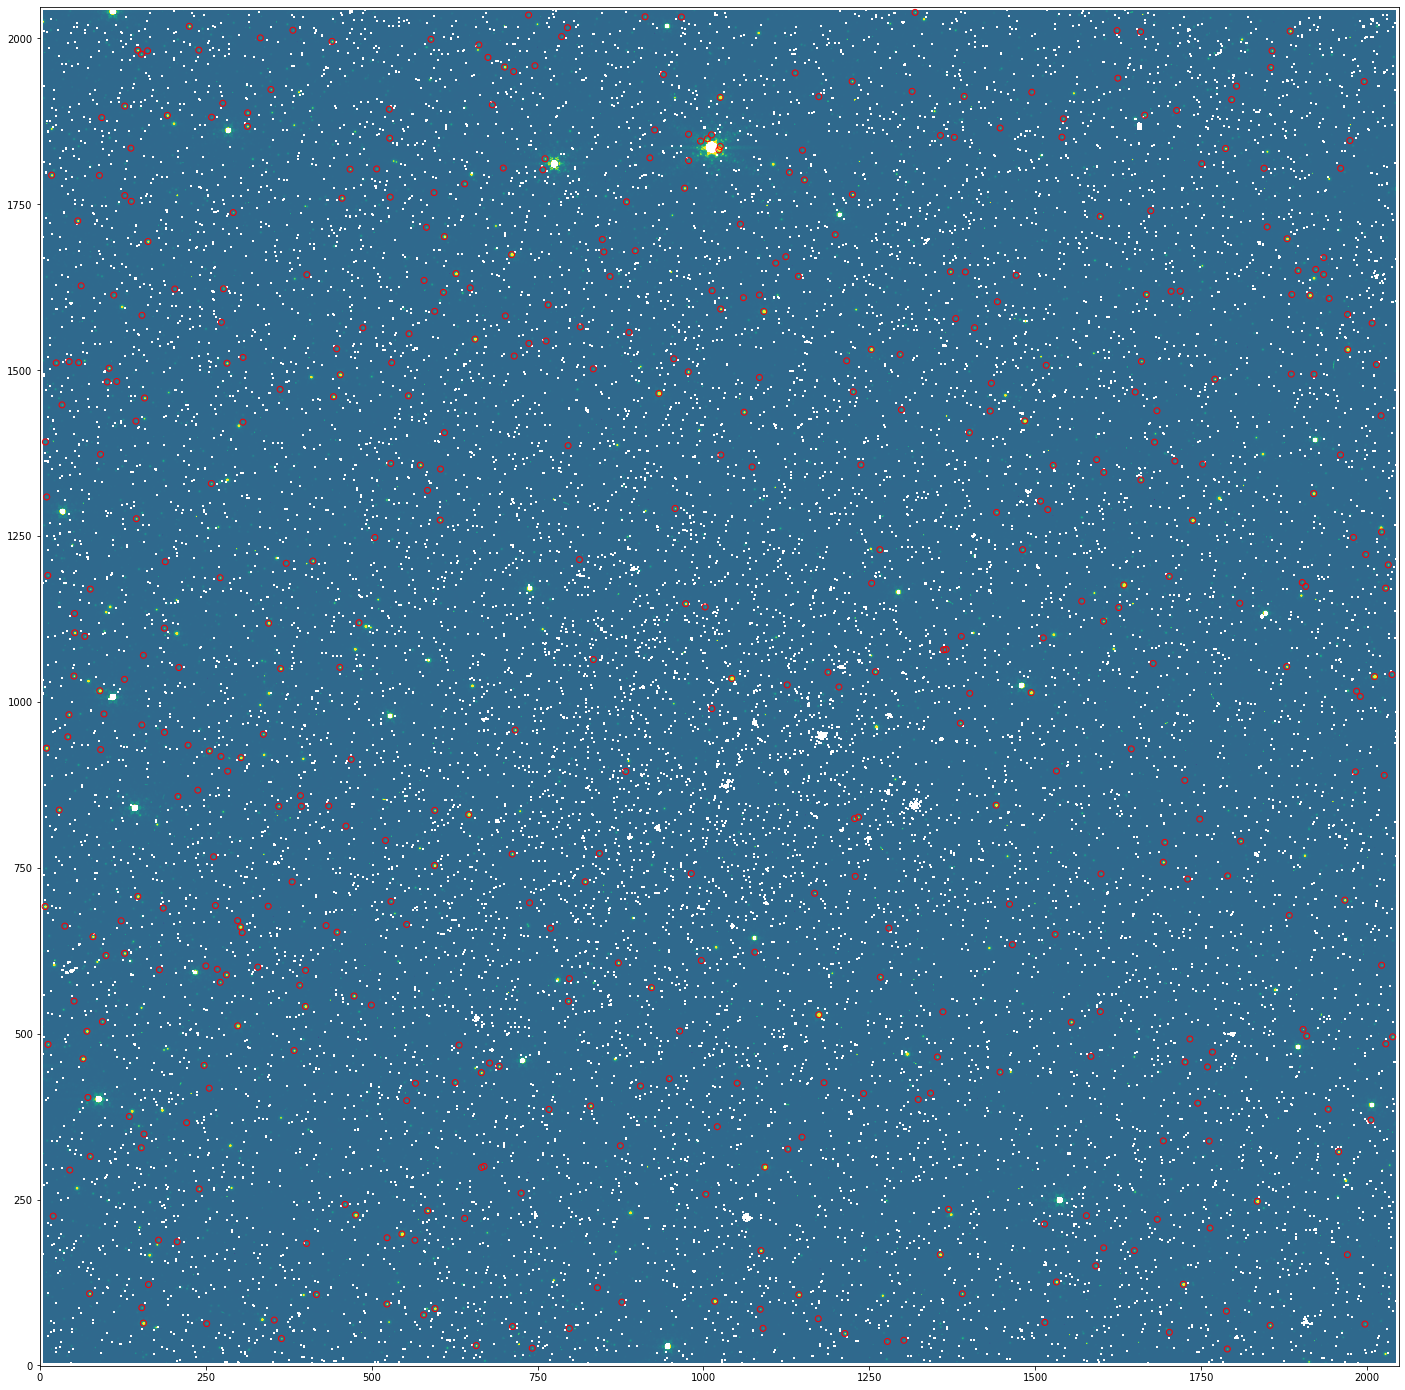

In [68]:
plt.figure(figsize=(25,25))
data = fits.getdata(destreak_fn, ext=1)
plt.imshow(data, norm=simple_norm(data, stretch='log', max_percent=99.95, log_a=1))
plt.scatter(tbl['x'], tbl['y'], edgecolor='r', facecolor='none')
plt.savefig('test.pdf')